# Homework 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
# read the dataset
filepath = r"Housing.csv"

df = pd.read_csv(filepath_or_buffer=filepath, sep=",")

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# check the shape of the dataset
print(f"Shape: {df.shape}")

Shape: (545, 13)


In [4]:
# check data type for each column of the dataset
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [5]:
# separate numeric values from non-numeric
df_numeric = df[["price", "area", "bedrooms", "bathrooms"]]

df_numeric.head()

,price,area,bedrooms,bathrooms
0,13300000,7420,4,2
1,12250000,8960,4,4
2,12250000,9960,3,2
3,12215000,7500,4,2
4,11410000,7420,4,1


In [6]:
# check if the dataset has NAs and drop them if any
print(f"price NAs: {df_numeric["price"].hasnans}")
print(f"area NAs: {df_numeric["area"].hasnans}")
print(f"bedrooms NAs: {df_numeric["bedrooms"].hasnans}")
print(f"bathrooms NAs: {df_numeric["bathrooms"].hasnans}")

price NAs: False
area NAs: False
bedrooms NAs: False
bathrooms NAs: False


In [7]:
# check the descriptive stats of the dataset
df_numeric.describe()

,price,area,bedrooms,bathrooms
count,5.450000e+02,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239
std,1.870440e+06,2170.141023,0.738064,0.502470
min,1.750000e+06,1650.000000,1.000000,1.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000


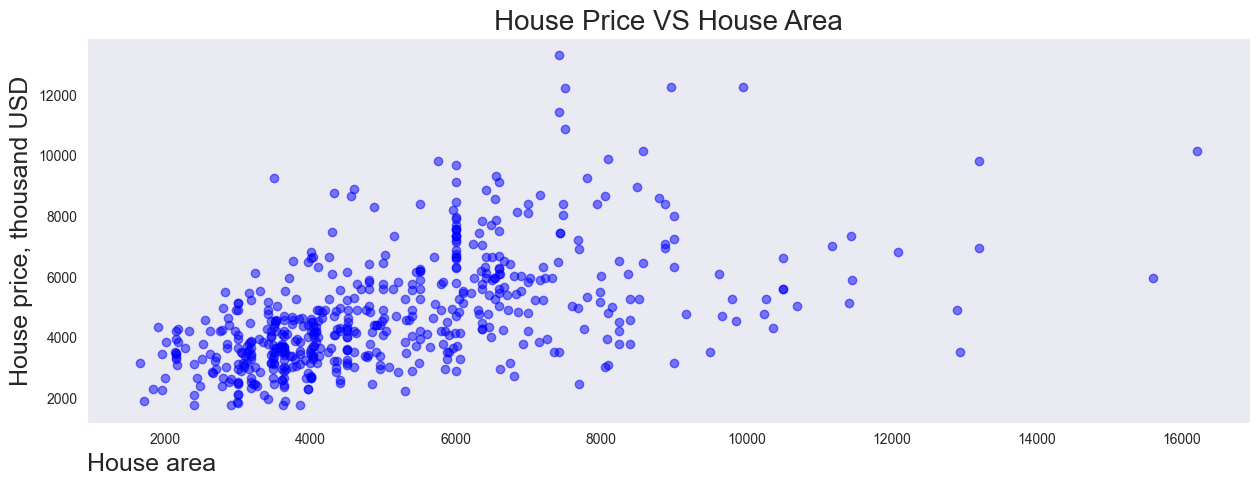

In [8]:
# build several correlation plots to see dependencies
# house price (in 1000 USD) VS house area
plt.figure(figsize=(15, 5))
plt.title("House Price VS House Area", fontsize=20)
plt.ylabel("House price, thousand USD", fontsize=18)
plt.xlabel("House area", fontsize=18, loc="left")
plt.grid()
plt.scatter(df_numeric["area"], df_numeric["price"] / 1000, alpha=0.5, color="blue")
plt.show()

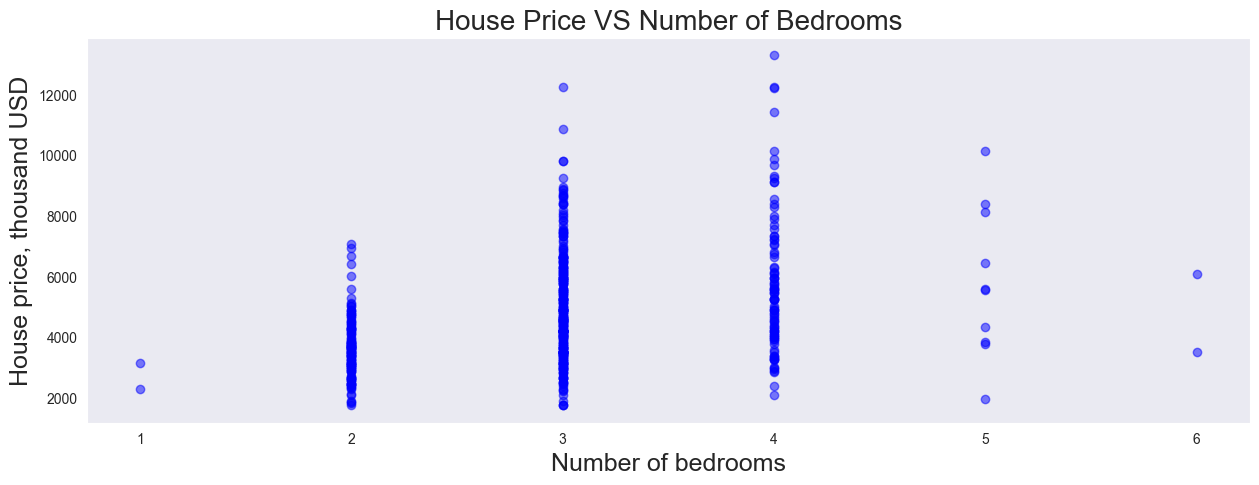

In [9]:
# house price (in 1000 USD) VS the number of bedrooms
plt.figure(figsize=(15, 5))
plt.title("House Price VS Number of Bedrooms", fontsize=20)
plt.ylabel("House price, thousand USD", fontsize=18)
plt.xlabel("Number of bedrooms", fontsize=18)
plt.grid()
plt.scatter(df_numeric["bedrooms"], df_numeric["price"] / 1000, alpha=0.5, color="blue")
plt.show()

In [10]:
# check the most frequent number of bedrooms and bathrooms
print(f"The most frequent number of bedrooms: {df_numeric["bedrooms"].mode()[0]}")
print(f"The most frequent number of bathrooms: {df_numeric["bathrooms"].mode()[0]}")

The most frequent number of bedrooms: 3
The most frequent number of bathrooms: 1


In [11]:
# write a vectorized linear regression function
def linear_regression(features: np.array, weights: np.array):
    return np.dot(features, weights)

Hypothesis function:

<hr>
<center> $f(x^{(i)}) = wx^{(i)} + b$ </center>
<hr>

In [12]:
# write a vectorized error loss function
def loss(weights: np.array, x: np.array, y: np,array):
    m = len(y)
    predicted_values = linear_regression(x, weights)
    return np.sum((predicted_values - y) ** 2) / (2 * m)

Loss function:

<hr>
<center> $J(f) = \frac{1}{2m} \sum^{m}_{i=1} (\hat{y}^{{(i)}} - y^{(i)})^2$ </center>
<hr>

In [13]:
# write a gradient descent function
def gradient_descent(weights: np.array, x: np.array, y: np.array, learning_rate: float):
    m = len(y)
    predicted_values = linear_regression(x, weights)
    gradient = np.dot(x.T, (predicted_values - y)) / m
    weights -= learning_rate * gradient
    return weights

In [14]:
# implement one step of gradient descent
X = df_numeric[["area", "bedrooms", "bathrooms"]]
y = df_numeric["price"]

step_result = gradient_descent(weights=(0, 0, 0),
                               x=X,
                               y=y,
                               learning_rate=0.00000002)

print(f"Gradient descent result:\n{step_result}")

Gradient descent result:
[5.34458401e+02 2.92780526e-01 1.32333353e-01]


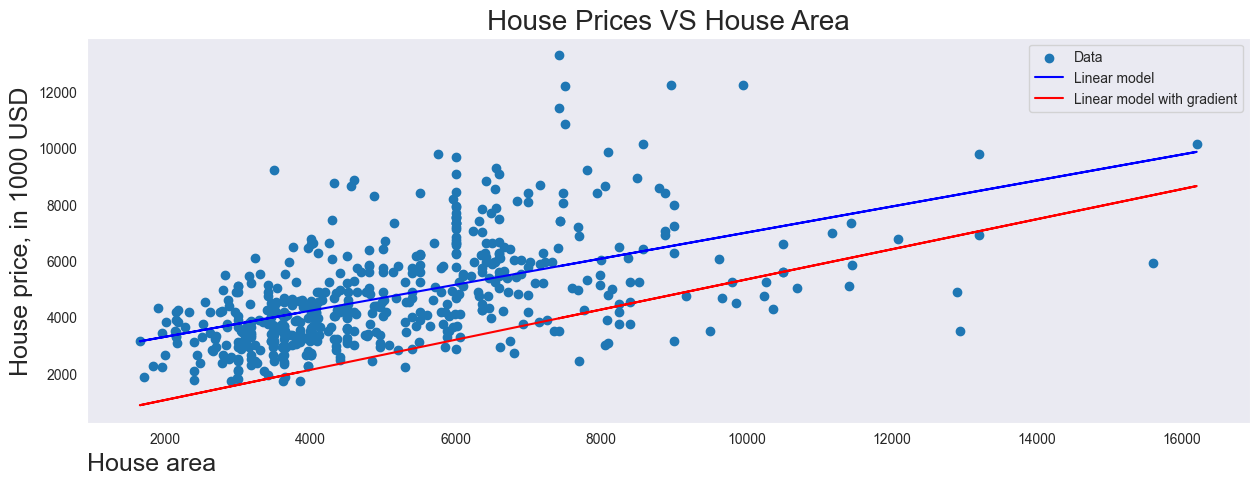

In [15]:
# perform linear regression model with gradient descent and compare the result
plt.figure(figsize=(15, 5))

X = df_numeric["area"]
y = df_numeric["price"]

slope, intercept = np.polyfit(X, y, 1)
slope_gradient, intercept_gradient = step_result[0], step_result[1]

plt.title("House Prices VS House Area", fontsize=20)
plt.xlabel("House area", fontsize=18, loc="left")
plt.ylabel("House price, in 1000 USD", fontsize=18)

plt.scatter(X, y / 1000, label='Data')
plt.plot(X, (X * slope + intercept) / 1000, color='blue', label="Linear model")
plt.plot(X, (X * slope_gradient + intercept_gradient) / 1000, color='red', label="Linear model with gradient")

plt.grid()
plt.legend()
plt.show()

In [16]:
# find the best parameters of w, depending on house area, the number of bedrooms, and the number of bathrooms 
def find_best_parameters(weights: np.array, x: np.array, y: np.array, learning_rate: float, iterations: int):
    scaler = StandardScaler()
    X = scaler.fit_transform(x)
    m, n = X.shape
    beta = np.zeros((n, 1))
    
    if isinstance(y, pd.Series):
        y = y.to_numpy()
    if y.ndim == 1:
        y = y.reshape(-1, 1)
    
    for i in range(num_iterations):
        beta = gradient_descent(beta, X, y, learning_rate)
    return beta


learning_rate = 0.0001
num_iterations = 10
X = df_numeric[["area", "bedrooms", "bathrooms"]]
y = df_numeric["price"]

best_parameters = find_best_parameters((0, 0, 0), X, y, learning_rate, num_iterations)

print(f"Best parameters:\n{best_parameters}")

Best parameters:
[[1001.04879665]
 [ 684.33660067]
 [ 966.51122327]]


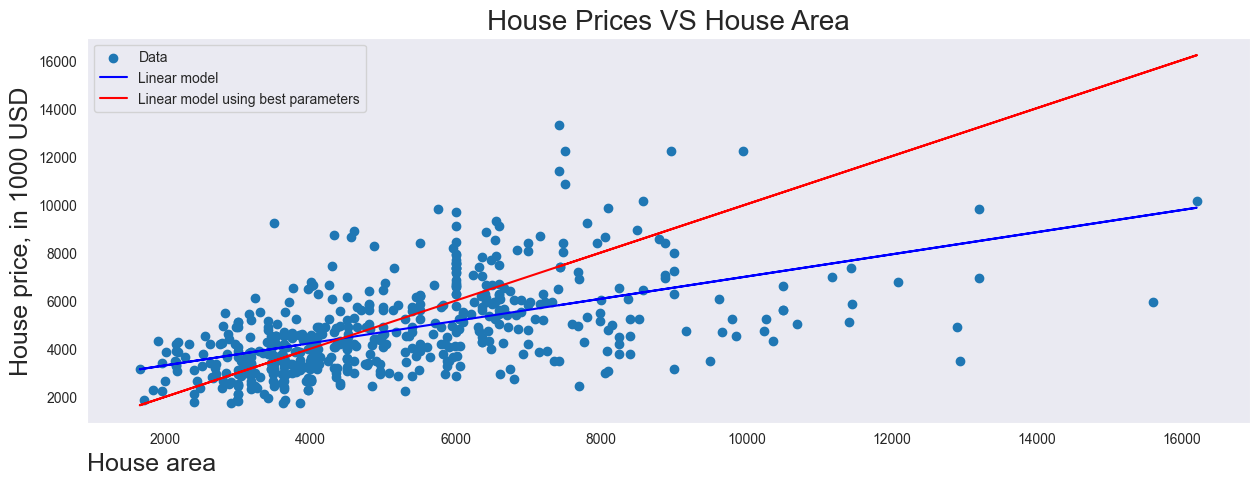

In [17]:
# perform linear regression model with gradient descent using updated best values
plt.figure(figsize=(15, 5))

X = df_numeric["area"]
y = df_numeric["price"]

slope, intercept = np.polyfit(X, y, 1)
slope_best, intercept_best = best_parameters[0], best_parameters[1]

plt.title("House Prices VS House Area", fontsize=20)
plt.xlabel("House area", fontsize=18, loc="left")
plt.ylabel("House price, in 1000 USD", fontsize=18)

plt.scatter(X, y / 1000, label='Data')
plt.plot(X, (X * slope + intercept) / 1000, color='blue', label="Linear model")
plt.plot(X, (X * slope_best + intercept_best) / 1000, color='red', label="Linear model using best parameters")

plt.grid()
plt.legend()
plt.show()

In [18]:
# find the best parameters using analytical approach
def analytical_approach(x: np.array, y: np.array, include_intercept=True):
    if include_intercept:
        x_i = np.c_[np.ones((x.shape[0], 1)), x]
    else:
        x_i = x
    theta = np.linalg.inv(x_i.T.dot(x_i)).dot(x_i.T).dot(y)
    
    return theta

Analytical approach parameters:
[-1.73171608e+05  3.78762754e+02  4.06820034e+05  1.38604950e+06]


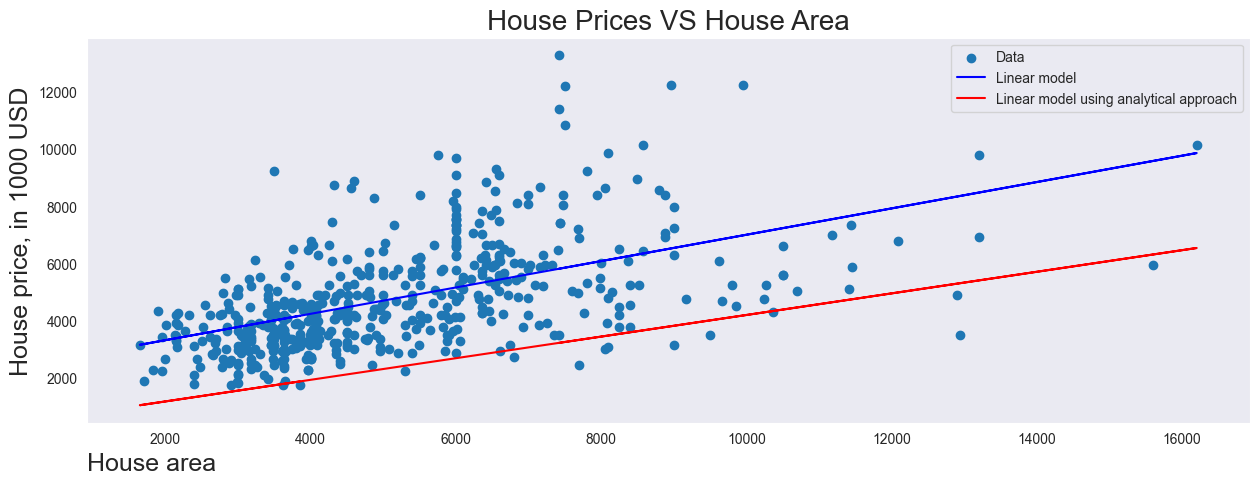

In [19]:
# perform linear regression model with gradient descent using the best parameters received previously
plt.figure(figsize=(15, 5))

features = df_numeric[["area", "bedrooms", "bathrooms"]]
analytical_params = analytical_approach(features, y, include_intercept=True)
print(f"Analytical approach parameters:\n{analytical_params}")

X = df_numeric["area"]
y = df_numeric["price"]

slope, intercept = np.polyfit(X, y, 1)
slope_analytical, intercept_analytical = analytical_params[1], analytical_params[2]

plt.title("House Prices VS House Area", fontsize=20)
plt.xlabel("House area", fontsize=18, loc="left")
plt.ylabel("House price, in 1000 USD", fontsize=18)

plt.scatter(X, y / 1000, label='Data')
plt.plot(X, (X * slope + intercept) / 1000, color='blue', label="Linear model")
plt.plot(X, (X * slope_analytical + intercept_analytical) / 1000, color='red', label="Linear model using analytical approach")

plt.grid()
plt.legend()
plt.show()